# Stripped Transmission matrix

The stripped transfer matrix $\hat{T}_j = Z_j T_j$ where $T_j$ is the standard transfer matrix.  The stripped transmission matrix is given by $$\hat{M} = \left(\prod_{j=1}^d Z_j \right) M$$ where $M$ is the standard transmission matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plotlogf
plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(symmetric=True)

In [3]:
Z0 = 1e-8
Z1 = A.Zi_from_Z0(Z0, A.ns[1])

## Transmission Matrices

In [4]:
# Standard version
A.transmission_matrix_Z(Z0)

array([[-1.78738691e+00-1.13863268e+08j,  1.66566853e-10-1.13863268e+08j],
       [ 2.44306472e-09+1.13863268e+08j, -1.78738690e+00+1.13863268e+08j]])

In [5]:
# Stripped version
A.transmission_matrix_Z(Z0, stripped=True)

array([[-4.66895779e-08-2.97430171j, -8.29174489e-17-2.97430171j],
       [ 8.29174489e-17+2.97430171j, -4.66895779e-08+2.97430171j]])

In [6]:
np.abs(A.transmission_matrix_Z(Z0) * Z0 * Z1 - A.transmission_matrix_Z(Z0, stripped=True))

array([[1.13124804e-16, 8.72684577e-17],
       [1.91004540e-17, 4.47734800e-17]])

### Transfer matrices

In [25]:
i = 2  # interface index
Z0 = 1e-8
Zi = A.Zi_from_Z0(Z0, A.ns[i])

In [29]:
# Standard transfer matrix
A.transfer_matrix_Z(Z0, A.Rhos[i], A.ns[i-1], A.ns[i])

array([[-1.12727999e+08+65961912.55170799j,
         1.12727999e+08+65961909.7921126j ],
       [ 1.12727999e+08-65961909.7921126j ,
        -1.12727999e+08-65961912.55170799j]])

In [30]:
# Stripped version 
A.transfer_matrix_Z(Z0, A.Rhos[i], A.ns[i-1], A.ns[i],stripped=True)  

array([[-1.12727999+0.65961913j,  1.12727999+0.6596191j ],
       [ 1.12727999-0.6596191j , -1.12727999-0.65961913j]])

In [31]:
# Relationship from intro holds
A.transfer_matrix_Z(Z0, A.Rhos[i], A.ns[i-1], A.ns[i]) * Zi - A.transfer_matrix_Z(Z0, A.Rhos[i], A.ns[i-1], A.ns[i],stripped=True)

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [117]:
MZ @ MZconj.conjugate()

array([[ 1.00000000e+00-1.11022302e-16j, -6.07487874e-17+3.33066907e-16j],
       [ 1.52268892e-17+0.00000000e+00j,  1.00000000e+00-1.11022302e-16j]])

In [118]:
V1 = np.ones(2)
V2 = np.array([1j, -1j])

In [119]:
MZ @ V1

array([1.90452517+0.95158617j, 0.26452444-1.16124528j])

In [120]:
MZ @ V2

array([0.30667147+1.02595879j, 0.09701236-1.14309082j])

## Determinant using stripped version of transmission matrix

In [41]:
A.transmission_matrix_Z(2 + 10j, stripped=True)

array([[ 4.33022078e+14-3.46486722e+15j,  2.31278174e+08-3.57098715e+08j],
       [-2.31278174e+08+3.57098715e+08j, -4.43100553e+01+2.69035217e+01j]])

(<Figure size 1100x500 with 2 Axes>, <Axes: >)

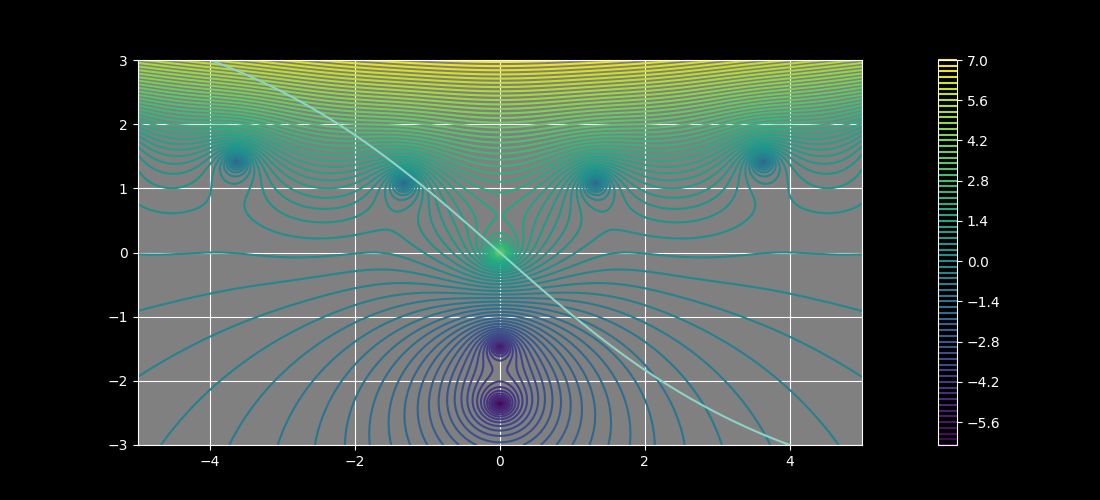

In [43]:
A.determinant_plot(-5, 5, -3, 3, stripped=False)

(<Figure size 1100x500 with 2 Axes>, <Axes: >)

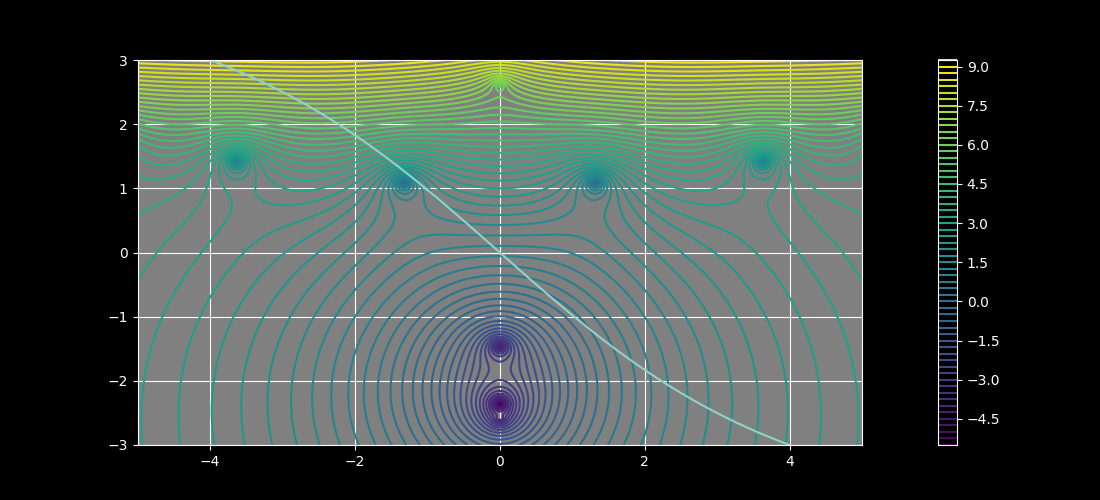

In [44]:
A.determinant_plot(-5, 5, -3, 3, stripped=True)

Oh right, as we get large values of Z, we are dividing by them in standard version, so that tends to make things smaller for large magnitude Z.  For small Z though, we remove a singularity at the origin (which was the point of adding the stripped version in the first place).  